In [3]:
import torch
from torch import nn
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot as plt
writer = SummaryWriter(log_dir="tb_runs1")

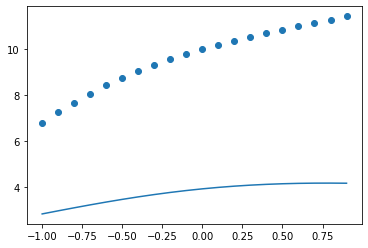

In [4]:
x = torch.arange(-1, 1, 0.1).view(-1, 1)
y = 0.4*x**3 - 0.8*x**2 + 2*x + 10

model = nn.Sequential(nn.Linear(1,30, bias=True)),
                      nn.Tanh(),
                      nn.Linear(30, 1, bias=True))
loss_fn = nn.MSELoss()

def train_model(n_epochs, optimizer, hparams):
    for epoch in range(n_epochs):
        pred = model(x)
        loss = loss_fn(pred, y)
        #writer.add_hparams(hparams,
        #                   "hparams/loss/train", loss)
        writer.add_scalar(f"Loss/train", loss, epoch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

lr = 0.001
hparams = {'lr': lr}
#model.__init__()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
train_model(30, optimizer, hparams)
writer.flush() #"make sure pending evnts have been written"
with torch.no_grad():
    pred = model(x)
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, pred)

In [5]:
writer.close()